# 카페 맛집 리스트
1. 사이트별 평균 평점 순위  

2. 모든 사이트 합친 평점순위  

3. 상위카페 평점 추이 확인

4. 상위카페 워드클라우드 분석


## 카페순위(다이닝 코드 기준)
#### 1. 알베르  
#### 2. 아우어베이커리  
#### 3. C27  
#### 4. 카페 노티드  
#### 5. 테사로사  코엑스점
#### 6. 겟썸커피 
#### 7. 클로리스 티 룸  
#### 8. 트리아농
#### 9. 카페413프로젝트
#### 10. 에이블
#### 11. 듀자미
#### 12. 세시셀라  
#### 13. 테사로사 포스코센터점

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # - 부호 표시

In [2]:
# store_list 양이 많아 13개의 가게로 추렸습니다
store_list=['알베르','아우어베이커리 도산본점','C27','카페 노티드','테라로사 코엑스점'
,'겟썸커피','클로리스 티 룸 코엑스몰점','트리아농'
,'카페413프로젝트','에이블'
,'듀자미','세시셀라 도산공원점','테라로사 포스코센터점']

### 망고플레이트 데이터 불러오기

In [3]:
for i,j in enumerate(store_list):
    if i==6:    # 망고플레이트 클로리스 티 룸은 없음
        continue
    else:
        exec("mango_{0}=pd.read_excel('망고플레이트리뷰/{0}. {1}.xlsx')".format(str(i+1),j))

### 구글데이터 불러오기

In [4]:
for i,j in enumerate(store_list):
    exec("google_{0}=pd.read_csv('구글리뷰/{1}.csv')".format(str(i+1),j))

### 다이닝코드데이터 불러오기

In [5]:
for i,j in enumerate(store_list):
    exec("dining_{0}=pd.read_csv('다이닝코드리뷰/{0}.{1}.csv')".format(str(i+1),j))

In [6]:
mango_13.head(3)

,Unnamed: 0,닉네임,평점,리뷰,날짜
0,0,용인불주먹,4.9,공간이 널찍하고 좋아서 오래 머물고 싶은 곳.\n아아가 산미 가득 취향저격이라 좋았...,1 일 전
1,1,* Y _,3.3,"3.5/5\n\n요약 : 넓고 큰 카페, 책이 많아 책을 읽고 싶은 기분을 내게 하...",2021-04-02
2,2,happynewyear,4.9,"강릉 경포호수점, 제주점과 더불어 가장 좋아하는 포스코지점. 특히나 겨울에 밖의 네...",2021-01-30


In [7]:
google_13.head(3)

,Unnamed: 0,ID,내용,날짜,별점
0,0,Rosa Kim,-테헤란로 대로변 중 상당한 사이즈를 자리하며 많은 양의 책으로 꾸민 분위기도 정말...,3달 전,4
1,1,Y.H. Chun,"주말, 삼성동 주변에 주차 가능하고 맛난 커피 마실 수 있는 곳이 흔치 않은데 간만...",7달 전,5
2,2,E. S. Lee,개인적으로 테라로사 매장 여러 곳을 가봤지만 여기 포스코점도 너무 좋습니다. Spe...,3달 전,5


In [8]:
dining_13.head(3)

,Unnamed: 0,이름,아이디,리뷰,날짜,별점
0,0,테라로사 포스코센터점,설향딸기,삼성과 선릉 사이에 있는 테라로사\n포스코센터 건물에 주차하면 된다.\n\n매장은 ...,2020년 9월 7일,4
1,1,테라로사 포스코센터점,깡목,카페 분위기가 좋아요 마치 해리포터가 된 느낌이랄까 커피향도 좋고 맛도 맛있어서 좋...,2020년 2월 26일,4
2,2,테라로사 포스코센터점,hisss,선릉역과 삼성역 중간에 위치한 카페로 역에서 오면 거리가 조금 있는 편이다. 분위기...,4월 11일,4


## 전처리 과정
1. 날짜: ~일전 -> 0000-00-00으로 변경  

2. 다이닝코드 이름 칼럼 제거  

3. 전체 Unnamed: 0 칼럼제거    

4. 칼럼 이름 통일하기

### 1. 날짜 변경

In [9]:
# 날짜변경 함수
from datetime import datetime
from dateutil.relativedelta import relativedelta

def change_day(day):
    now_date = datetime(2021,5,25)

    if day[-1]=='전':
        if day[-3:]=='일 전':
            num=day.split('일 전')
            new_date=now_date + relativedelta(days=-int(num[0]))
            return new_date.date()

        elif day[-3:]=='달 전':
            num=day.split('달 전')
            new_date=now_date + relativedelta(months=-int(num[0]))
            return new_date.date()

        elif day[-3:]=='년 전':
            num=day.split('년 전')
            new_date=now_date + relativedelta(years=-int(num[0]))
            return new_date.date()

        else:
            return now_date

    elif day[-1]=='일':

        if day[4]=='년':
            date=day.split('년')
            year=date[0].strip()
            date=date[1].split('월')
            month=date[0].strip()
            if len(month)==1:
                month='0'+month
            date=date[1].split('일')
            day_d=date[0].strip()
            if len(day_d)==1:
                day_d='0'+day_d
            return year+'-'+month+'-'+day_d

        else:
            year='2021'
            date=day.split('월')
            month=date[0].strip()
            if len(month)==1:
                month='0'+month
            date=date[1].split('일')
            day_d=date[0].strip()
            if len(day_d)==1:
                day_d='0'+day_d
            return year+'-'+month+'-'+day_d

    else:
        return day


In [10]:
for i in range(len(store_list)):
    if i==6:    # 망고플레이트 클로리스 티 룸은 없음
        continue
    else:
        exec("mango_{0}['날짜']=mango_{0}['날짜'].apply(change_day)".format(str(i+1)))

In [11]:
for i in range(len(store_list)):
    exec("google_{0}['날짜']=google_{0}['날짜'].apply(change_day)".format(str(i+1)))

In [12]:
for i in range(len(store_list)):
    exec("dining_{0}['날짜']=dining_{0}['날짜'].apply(change_day)".format(str(i+1)))

In [13]:
mango_13.head(3)

,Unnamed: 0,닉네임,평점,리뷰,날짜
0,0,용인불주먹,4.9,공간이 널찍하고 좋아서 오래 머물고 싶은 곳.\n아아가 산미 가득 취향저격이라 좋았...,2021-05-24
1,1,* Y _,3.3,"3.5/5\n\n요약 : 넓고 큰 카페, 책이 많아 책을 읽고 싶은 기분을 내게 하...",2021-04-02
2,2,happynewyear,4.9,"강릉 경포호수점, 제주점과 더불어 가장 좋아하는 포스코지점. 특히나 겨울에 밖의 네...",2021-01-30


In [14]:
google_13.head(3)

,Unnamed: 0,ID,내용,날짜,별점
0,0,Rosa Kim,-테헤란로 대로변 중 상당한 사이즈를 자리하며 많은 양의 책으로 꾸민 분위기도 정말...,2021-02-25,4
1,1,Y.H. Chun,"주말, 삼성동 주변에 주차 가능하고 맛난 커피 마실 수 있는 곳이 흔치 않은데 간만...",2020-10-25,5
2,2,E. S. Lee,개인적으로 테라로사 매장 여러 곳을 가봤지만 여기 포스코점도 너무 좋습니다. Spe...,2021-02-25,5


In [15]:
dining_13.head(3)

,Unnamed: 0,이름,아이디,리뷰,날짜,별점
0,0,테라로사 포스코센터점,설향딸기,삼성과 선릉 사이에 있는 테라로사\n포스코센터 건물에 주차하면 된다.\n\n매장은 ...,2020-09-07,4
1,1,테라로사 포스코센터점,깡목,카페 분위기가 좋아요 마치 해리포터가 된 느낌이랄까 커피향도 좋고 맛도 맛있어서 좋...,2020-02-26,4
2,2,테라로사 포스코센터점,hisss,선릉역과 삼성역 중간에 위치한 카페로 역에서 오면 거리가 조금 있는 편이다. 분위기...,2021-04-11,4


### 2. 다이닝 이름 칼럼 제거

In [16]:
for i in range(len(store_list)):
    exec("dining_{0}.drop(['Unnamed: 0','이름'],inplace=True,axis=1)".format(str(i+1)))

In [17]:
dining_1.head(3)

,아이디,리뷰,날짜,별점
0,조이,"엄청난 규모를 자랑하는, 강남역 대표 커피숍. 지하부터 윗층까지 상당히 넓은 공간을...",2019-07-16,3
1,victor,티라미슈와 아메리카노 맛있어요- 근데 케셔 남자분 굳이 그렇게 인상 쓰시고 한숨 쉬...,2017-10-22,4
2,Kim Seb,"지하에 큰 좌석, 1, 2층에도 좌석.. 정말 대박.. 강남역에서 어떻게 유지할까....",2017-08-05,4


### 3. Unnamed: 0 칼럼 삭제하기

In [18]:
for i in range(len(store_list)):
    if i==6:    # 망고플레이트 클로리스 티 룸은 없음
        continue
    else:
        exec("mango_{0}.drop('Unnamed: 0',inplace=True,axis=1)".format(str(i+1)))

In [19]:
for i in range(len(store_list)):
    exec("google_{0}.drop('Unnamed: 0',inplace=True,axis=1)".format(str(i+1)))

In [20]:
google_1.tail(2)

,ID,내용,날짜,별점
298,Inwoo Yeo,장소가 넓어서 앉을 곳이 많아요,2018-05-25,5
299,Shannon Choi,넓고 커피가 제 입맛에 딱 맞아서 강남 갈때마다 여기로 가요 커피 존맛 ㅠㅜ 티라...,2019-05-25,5


In [21]:
mango_1.tail(2)

,닉네임,평점,리뷰,날짜
48,내일은먹방중,4.9,티라미수가 너무 맛있어서 연속으로 찾아갔던 곳. 카페 규모가 굉장합니다. 그에 비해...,2017-10-14
49,윤,3.3,가을시즌 시그니처라는 플랫화이트 먹어보려니 8시 마감...? 읭...? 라떼에 샷 ...,2017-10-08


In [22]:
dining_1.tail(2)

,아이디,리뷰,날짜,별점
40,싸펑피펑,콘이 먹음직해보여서 무화과콘을 먹었는데 그닥이네요.. 아메리카노랑 청포도주스는 맛있...,2017-03-19,3
41,호자이,NaN,2017-04-09,4


### 4. 칼럼 이름 통일하기

In [23]:
for i in range(len(store_list)):
    if i==6:    # 망고플레이트 클로리스 티 룸은 없음
        continue
    else:
        exec("mango_{0}.columns=['ID','평점','리뷰','날짜']".format(str(i+1)))

In [24]:
mango_1.head(1)

,ID,평점,리뷰,날짜
0,앨리스,3.3,"공간을 보는 재미가 큰 알베르\n지하, 1층, 2층까지 커다란 테이블도 있고 한쪽 ...",2021-04-23


In [25]:
for i in range(len(store_list)):
    exec("google_{}.columns=['ID','리뷰','날짜','평점']".format(str(i+1),j))

In [26]:
google_1.head(1)

,ID,리뷰,날짜,평점
0,황지연,강남도심속에 이렇개 을창한 숲같은 분위기의 카페가 존재한다는게 놀라운데 규모도 스타...,2021-05-20,4


In [27]:
for i in range(len(store_list)):
    exec("dining_{}.columns=['ID','리뷰','날짜','평점']".format(str(i+1)))

In [28]:
dining_1.tail(1)

,ID,리뷰,날짜,평점
41,호자이,NaN,2017-04-09,4


## 각 사이트별 평균 평점 비교

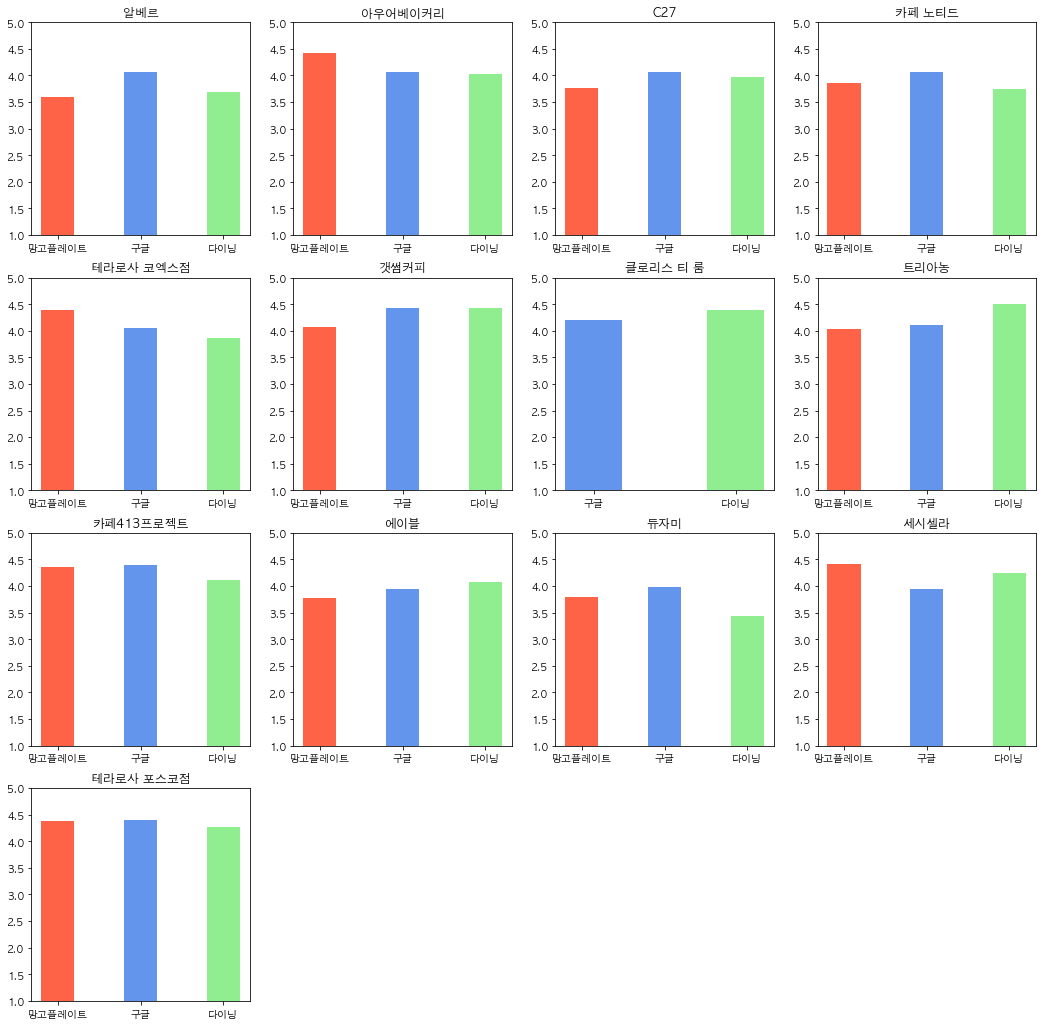

In [29]:
plt.figure(figsize=(18,18))
#알베르
x=['망고플레이트','구글','다이닝']
y=[mango_1['평점'].mean(),google_1['평점'].mean(),dining_1['평점'].mean()]
c=['tomato','cornflowerblue','lightgreen']
plt.subplot(441)
plt.title('알베르')
plt.bar(x,y,width=0.4,color=c)
plt.ylim(1,5)

#아우어베이커리
x=['망고플레이트','구글','다이닝']
y=[mango_2['평점'].mean(),google_2['평점'].mean(),dining_2['평점'].mean()]
c=['tomato','cornflowerblue','lightgreen']
plt.subplot(442)
plt.title('아우어베이커리')
plt.bar(x,y,width=0.4,color=c)
plt.ylim(1,5)

#C27
x=['망고플레이트','구글','다이닝']
y=[mango_3['평점'].mean(),google_3['평점'].mean(),dining_3['평점'].mean()]
c=['tomato','cornflowerblue','lightgreen']
plt.subplot(443)
plt.title('C27')
plt.bar(x,y,width=0.4,color=c)
plt.ylim(1,5)

#카페 노티드
x=['망고플레이트','구글','다이닝']
y=[mango_4['평점'].mean(),google_4['평점'].mean(),dining_4['평점'].mean()]
c=['tomato','cornflowerblue','lightgreen']
plt.subplot(444)
plt.title('카페 노티드')
plt.bar(x,y,width=0.4,color=c)
plt.ylim(1,5)


#테라로사 코엑스점
x=['망고플레이트','구글','다이닝']
y=[mango_5['평점'].mean(),google_5['평점'].mean(),dining_5['평점'].mean()]
c=['tomato','cornflowerblue','lightgreen']
plt.subplot(445)
plt.title('테라로사 코엑스점')
plt.bar(x,y,width=0.4,color=c)
plt.ylim(1,5)

#갯썸커피
x=['망고플레이트','구글','다이닝']
y=[mango_6['평점'].mean(),google_6['평점'].mean(),dining_6['평점'].mean()]
c=['tomato','cornflowerblue','lightgreen']
plt.subplot(446)
plt.title('갯썸커피')
plt.bar(x,y,width=0.4,color=c)
plt.ylim(1,5)

#클로리스 티 룸
x=['구글','다이닝']
y=[google_7['평점'].mean(),dining_7['평점'].mean()]
c=['cornflowerblue','lightgreen']
plt.subplot(447)
plt.title('클로리스 티 룸')
plt.bar(x,y,width=0.4,color=c)
plt.ylim(1,5)

#트리아농
x=['망고플레이트','구글','다이닝']
y=[mango_8['평점'].mean(),google_8['평점'].mean(),dining_8['평점'].mean()]
c=['tomato','cornflowerblue','lightgreen']
plt.subplot(448)
plt.title('트리아농')
plt.bar(x,y,width=0.4,color=c)
plt.ylim(1,5)

#카페413프로젝트
x=['망고플레이트','구글','다이닝']
y=[mango_9['평점'].mean(),google_9['평점'].mean(),dining_9['평점'].mean()]
c=['tomato','cornflowerblue','lightgreen']
plt.subplot(449)
plt.title('카페413프로젝트')
plt.bar(x,y,width=0.4,color=c)
plt.ylim(1,5)

#에이블
x=['망고플레이트','구글','다이닝']
y=[mango_10['평점'].mean(),google_10['평점'].mean(),dining_10['평점'].mean()]
c=['tomato','cornflowerblue','lightgreen']
plt.subplot(4,4,10)
plt.title('에이블')
plt.bar(x,y,width=0.4,color=c)
plt.ylim(1,5)

#듀자미
x=['망고플레이트','구글','다이닝']
y=[mango_11['평점'].mean(),google_11['평점'].mean(),dining_11['평점'].mean()]
c=['tomato','cornflowerblue','lightgreen']
plt.subplot(4,4,11)
plt.title('듀자미')
plt.bar(x,y,width=0.4,color=c)
plt.ylim(1,5)

#세시셀라
x=['망고플레이트','구글','다이닝']
y=[mango_12['평점'].mean(),google_12['평점'].mean(),dining_12['평점'].mean()]
c=['tomato','cornflowerblue','lightgreen']
plt.subplot(4,4,12)
plt.title('세시셀라')
plt.bar(x,y,width=0.4,color=c)
plt.ylim(1,5)

#테라로사 포스코점
x=['망고플레이트','구글','다이닝']
y=[mango_13['평점'].mean(),google_13['평점'].mean(),dining_13['평점'].mean()]
c=['tomato','cornflowerblue','lightgreen']
plt.subplot(4,4,13)
plt.title('테라로사 포스코점')
plt.bar(x,y,width=0.4,color=c)
plt.ylim(1,5)
plt.show()

## 모든 사이트 평점 합 비교

In [30]:
for i in range(len(store_list)):
    if i==6:    # 망고플레이트 클로리스 티 룸은 없음
        exec("all_caffe7=dining_7.append([google_7],ignore_index=True)")
    else:
        exec("all_caffe{0}=mango_{0}.append([google_{0},dining_{0}],ignore_index=True)".format(str(i+1)))

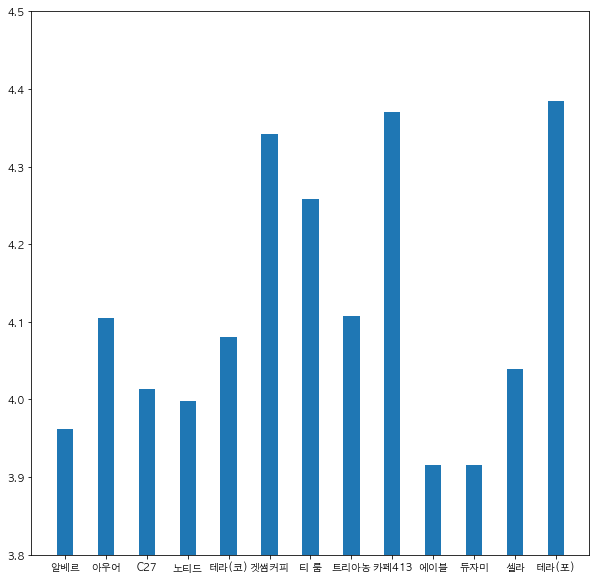

In [31]:
x=['알베르','아우어','C27','노티드','테라(코)'
,'겟썸커피','티 룸','트리아농'
,'카페413','에이블'
,'듀자미','셀라','테라(포)']

y=[all_caffe1['평점'].mean(),all_caffe2['평점'].mean(),all_caffe3['평점'].mean(),all_caffe4['평점'].mean(),all_caffe5['평점'].mean(),all_caffe6['평점'].mean(),all_caffe7['평점'].mean(),all_caffe8['평점'].mean(),all_caffe9['평점'].mean(),all_caffe10['평점'].mean(),all_caffe11['평점'].mean(),all_caffe12['평점'].mean(),all_caffe13['평점'].mean()]

plt.figure(figsize=(10,10))
plt.ylim(3.8,4.5)
plt.bar(x,y,width=0.4)
plt.show()

### 각 사이트 별 평점 비교했을 때 평준화가 잘 되어 있고, 높은 평점을 가진 카페 순위
1. 테타로사 포스코지점

2. 카페413프로젝트  

3. 갯썸커피

4. 아우어베이커리

### 모든 사이트를 합치고 높은 평점을 가진 카페 순위
1. 테타로사 포스코지점  

2. 카페413프로젝트  

3. 갯썸커피  

4. 클로리스 티 룸  

상위 4개의 카페 지점에서 4순위 빼고 변동사항 없음.  
#### 결론: 두 가지 모든 경우 1,2,3등을 차지한 '테라로사 포스코지점', '카페413프로젝트', '갯썸커피'가 맛집이라 판단  

## 테라로사(포스코) 카페의 평점 박스 플롯

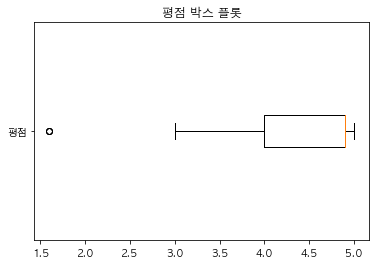

In [32]:
all_caffe13=all_caffe13.astype({'날짜':'str'})
data=np.array(all_caffe13.groupby('날짜').mean(['평점']))
plt.title('평점 박스 플롯')
plt.boxplot(data,vert=0)
plt.yticks([1],['평점'])
plt.show()

### 가장 낮은 점수를 보여준 듀자미 카페의 평점 박스 플롯

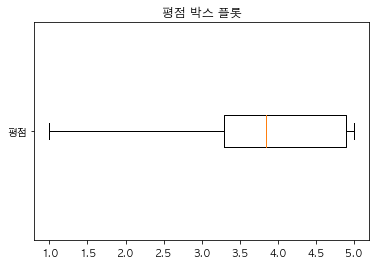

In [33]:
all_caffe11=all_caffe11.astype({'날짜':'str'})
data=np.array(all_caffe11.groupby('날짜').mean(['평점']))
plt.title('평점 박스 플롯')
plt.boxplot(data,vert=0)
plt.yticks([1],['평점'])
plt.show()

## 워드클라우드 분석

In [34]:
from konlpy.tag import Hannanum, Kkma, Twitter, Komoran, Mecab
from wordcloud import WordCloud
from tqdm import tqdm

from collections import Counter

In [35]:
all_caffe13['리뷰']=all_caffe13['리뷰'].str.strip()
all_caffe13['리뷰'].replace('', np.nan, inplace=True)
df = all_caffe13.dropna()
df.drop('날짜',axis=1,inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
df.shape

(304, 3)

In [37]:
extractor = Hannanum()

nouns = []

for i, row in tqdm(df.iterrows()):
    num, title, content = row

    if title and type(title) is str:
        nouns.extend(extractor.nouns(title))
    if content and type(content) is str:
        nouns.extend(extractor.nouns(content))

304it [00:05, 57.79it/s] 


In [38]:
count = Counter(nouns)
words = dict(count.most_common())
print(words)

{'커피': 159, '공간': 91, '분위기': 71, '것': 66, '테라로사': 65, '수': 59, '맛': 55, '책': 52, '곳': 48, '카페': 47, '자리': 47, '사람': 44, '인테리어': 42, '포스코': 31, '주차': 25, '2층': 25, '커피맛': 24, '주말': 23, '테이블': 22, '듯': 21, '1층': 18, '주문': 18, '최고': 17, '디저트': 17, '인테리': 17, '공부': 16, '빵': 16, '장소': 16, '좌석': 14, '2시간': 14, '때': 13, '원두': 13, '일': 13, '추천': 12, '편': 12, '쾌적': 12, '나': 11, '데': 11, '규모': 11, '건물': 11, '시간': 11, '가능': 11, '느낌': 11, '여유': 11, '무료': 10, '내부': 10, '가격': 10, '포스코센터': 10, '오늘': 10, '줄': 10, '철': 10, '만족': 9, '강릉': 9, '작업': 9, '다양': 9, '계단': 9, '종류': 9, '드립': 9, '유명': 9, '매장': 9, '기분': 8, '정도': 8, '적': 8, '생각': 8, '만': 8, '저': 8, '여기': 8, '의자': 8, '불편': 8, '서울': 8, '거': 8, '피칸파이': 8, '훌륭': 8, '독특': 8, '평': 7, '번': 7, '도서관': 7, '방문': 7, '들': 7, '드립커피': 7, '티라미슈': 7, '음료': 7, '지점': 7, '빌딩': 7, '강남': 7, '베이커리': 6, '개': 6, '레몬': 6, '내': 6, '편안': 6, '노트북': 6, '지': 6, '인상적': 6, '콘센트': 6, '친절': 6, '계단식': 6, '포스코점': 6, '라': 6, '사이즈': 6, '오전': 6, '점심시간': 6, '등': 6, '경험': 6, '점': 6, '커피숍':

In [39]:
for word in list(words.keys()):
    if len(word) == 1:
        del words[word]
        continue
        
    if words[word] == 1:
        del words[word]
    
    if word=='00':
        del words[word]
    
print(words)

{'커피': 159, '공간': 91, '분위기': 71, '테라로사': 65, '카페': 47, '자리': 47, '사람': 44, '인테리어': 42, '포스코': 31, '주차': 25, '2층': 25, '커피맛': 24, '주말': 23, '테이블': 22, '1층': 18, '주문': 18, '최고': 17, '디저트': 17, '인테리': 17, '공부': 16, '장소': 16, '좌석': 14, '2시간': 14, '원두': 13, '추천': 12, '쾌적': 12, '규모': 11, '건물': 11, '시간': 11, '가능': 11, '느낌': 11, '여유': 11, '무료': 10, '내부': 10, '가격': 10, '포스코센터': 10, '오늘': 10, '만족': 9, '강릉': 9, '작업': 9, '다양': 9, '계단': 9, '종류': 9, '드립': 9, '유명': 9, '매장': 9, '기분': 8, '정도': 8, '생각': 8, '여기': 8, '의자': 8, '불편': 8, '서울': 8, '피칸파이': 8, '훌륭': 8, '독특': 8, '도서관': 7, '방문': 7, '드립커피': 7, '티라미슈': 7, '음료': 7, '지점': 7, '빌딩': 7, '강남': 7, '베이커리': 6, '레몬': 6, '편안': 6, '노트북': 6, '인상적': 6, '콘센트': 6, '친절': 6, '계단식': 6, '포스코점': 6, '사이즈': 6, '오전': 6, '점심시간': 6, '경험': 6, '커피숍': 6, '응대': 6, '뭔가': 5, '사진': 5, '치즈': 5, '가득': 5, '포스코센터점': 5, '철제': 5, '구경': 5, '활용': 5, '선릉역': 5, '근처': 5, '진짜': 5, 'ㅠㅠ': 5, '가족': 5, '아메리카노': 5, '삼성역': 5, '무난': 5, '컨셉': 5, '주변': 5, '도심속': 5, '깔끔': 5, '거리': 5, '이곳': 5, '디자인': 5,

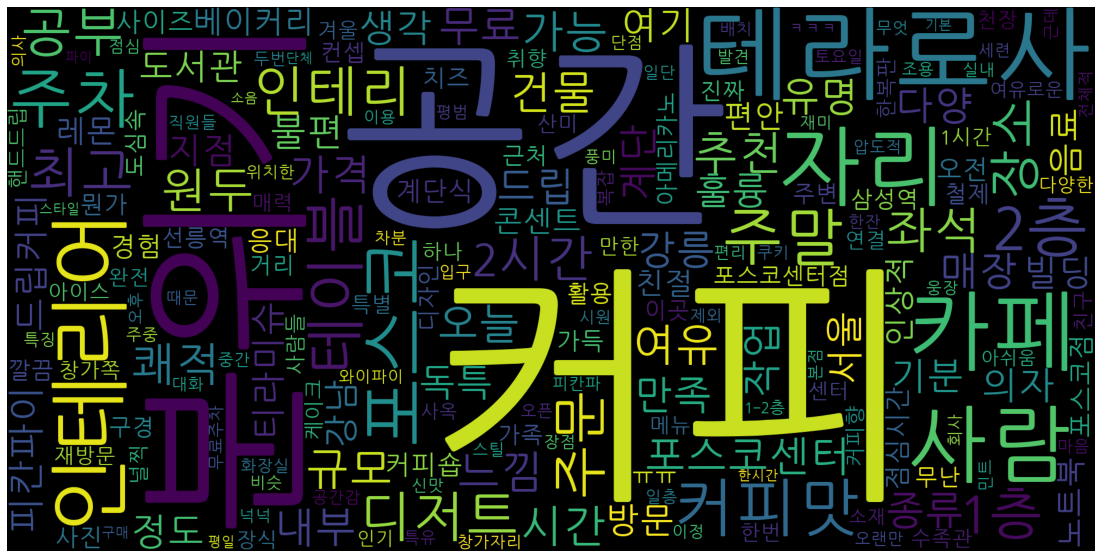

In [40]:
wc = WordCloud(
    font_path='NanumGothicCoding.ttf',
    width=2000,
    height=1000
).generate_from_frequencies(words)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 워드클라우드 분석을 통해 음식 중에서 커피, 티라미슈, 피칸파이가 많이 언급된다는 것을 확인할 수 있습니다